<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-06-13 13:01:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.14’

m4_survey_data.sqli 100%[===================>]  34.98M  43.9MB/s    in 0.8s    

2022-06-13 13:01:36 (43.9 MB/s) - ‘m4_survey_data.sqlite.14’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
group by age
order by age
"""
#pd.read_sql_query(QUERY, conn) 

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
#print(df.iat[0,0])   #print of table fields

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
df = pd.read_sql_query("SELECT * FROM master", conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


In [9]:
# your code goes here -REPLACE WITH CODE from M3 lAB USING Y vs YHat
#WORKING CODE

"""
# matplotlib histogram - to show data distribution
bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins
plt.figure(figsize=(15, 8), edgecolor='blue')
plt.hist(df['ConvertedComp'].dropna(), color = 'blue', edgecolor = 'black', bins = int(2000000/200000))

plt.title('Distribution of Converted Salaries')
plt.xlabel('Months (Time)')
plt.ylabel('Conversion Amt.')
"""

"\n# matplotlib histogram - to show data distribution\nbins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins\nplt.figure(figsize=(15, 8), edgecolor='blue')\nplt.hist(df['ConvertedComp'].dropna(), color = 'blue', edgecolor = 'black', bins = int(2000000/200000))\n\nplt.title('Distribution of Converted Salaries')\nplt.xlabel('Months (Time)')\nplt.ylabel('Conversion Amt.')\n"

Text(0, 0.5, 'Conversion Amt.')

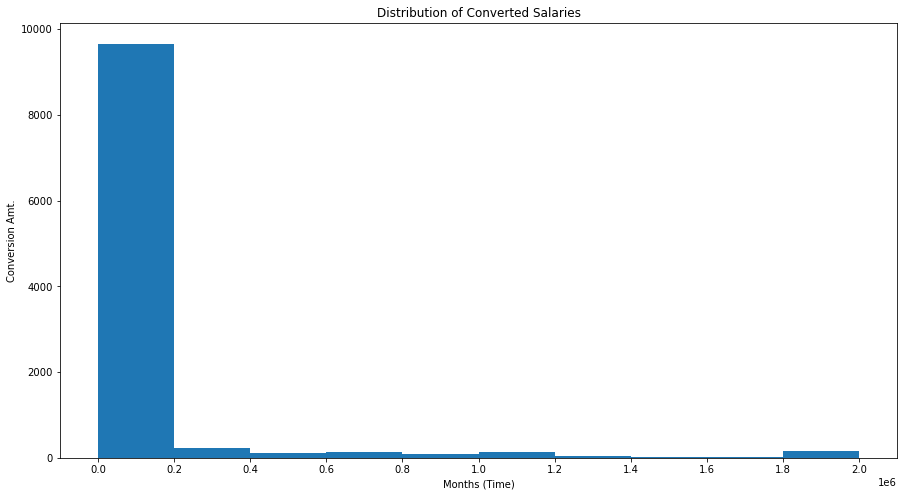

In [10]:
#  Concept from Week 2 - HISTOGRAMS

count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
df["ConvertedComp"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Distribution of Converted Salaries")
plt.xlabel("Months (Time)")
plt.ylabel("Conversion Amt.")

#plt.show()

### Box Plots


Plot a box plot of `Age.`


In [11]:
df['Age'].isnull().sum()  #See if any Missing Values

287

In [12]:
# Replacement of Missing Values with Mean of AGE

meanAge = df['Age'].mean()
df['Age'].replace(np.nan, meanAge, inplace=True)

In [13]:
# your code goes here - Working code 
"""
plt.figure(figsize = (18, 4))
#figure_name = plt.figure(figsize=(width, height))
plt.boxplot(x=df['Age'], vert=False)
plt.title('BoxPlot of AGE Variable')
plt.xlabel('Age')
"""

"\nplt.figure(figsize = (18, 4))\n#figure_name = plt.figure(figsize=(width, height))\nplt.boxplot(x=df['Age'], vert=False)\nplt.title('BoxPlot of AGE Variable')\nplt.xlabel('Age')\n"

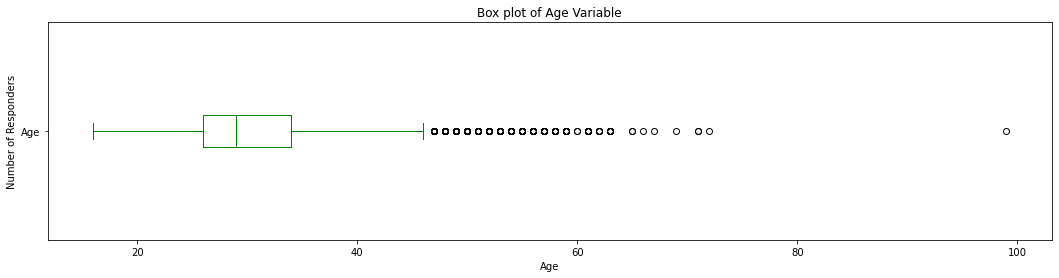

In [14]:
# your code goes here - Working code 

df['Age'].plot(kind='box', vert=False, color='green', figsize=(18, 4))

plt.title('Box plot of Age Variable')
plt.xlabel('Age')
plt.ylabel('Number of Responders')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [15]:
# Getting AGE & WORKWEEKHRS from master table

QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""

dfScattr = pd.read_sql_query(QUERY, conn)
dfScattr

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


In [16]:
if dfScattr['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanScattr = dfScattr['WorkWeekHrs'].mean()
    dfScattr['WorkWeekHrs'].replace(np.nan, meanScattr, inplace=True)
    
if dfScattr['Age'].isnull().sum():  #See if any Missing Values
    meanAge = dfScattr['Age'].mean()
    dfScattr['Age'].replace(np.nan, meanAge, inplace=True)

In [17]:
# your code goes here - WORKING CODE 
#https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html
"""
plt.figure(figsize = (16, 8))

sns.regplot(x= dfScattr['Age'], y=dfScattr['WorkWeekHrs'], data=dfScattr)
plt.ylim(0)

plt.title('Scatter Plot: Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()
"""

"\nplt.figure(figsize = (16, 8))\n\nsns.regplot(x= dfScattr['Age'], y=dfScattr['WorkWeekHrs'], data=dfScattr)\nplt.ylim(0)\n\nplt.title('Scatter Plot: Age vs WorkWeekHrs')\nplt.xlabel('Age')\nplt.ylabel('WorkWeekHrs')\nplt.show()\n"

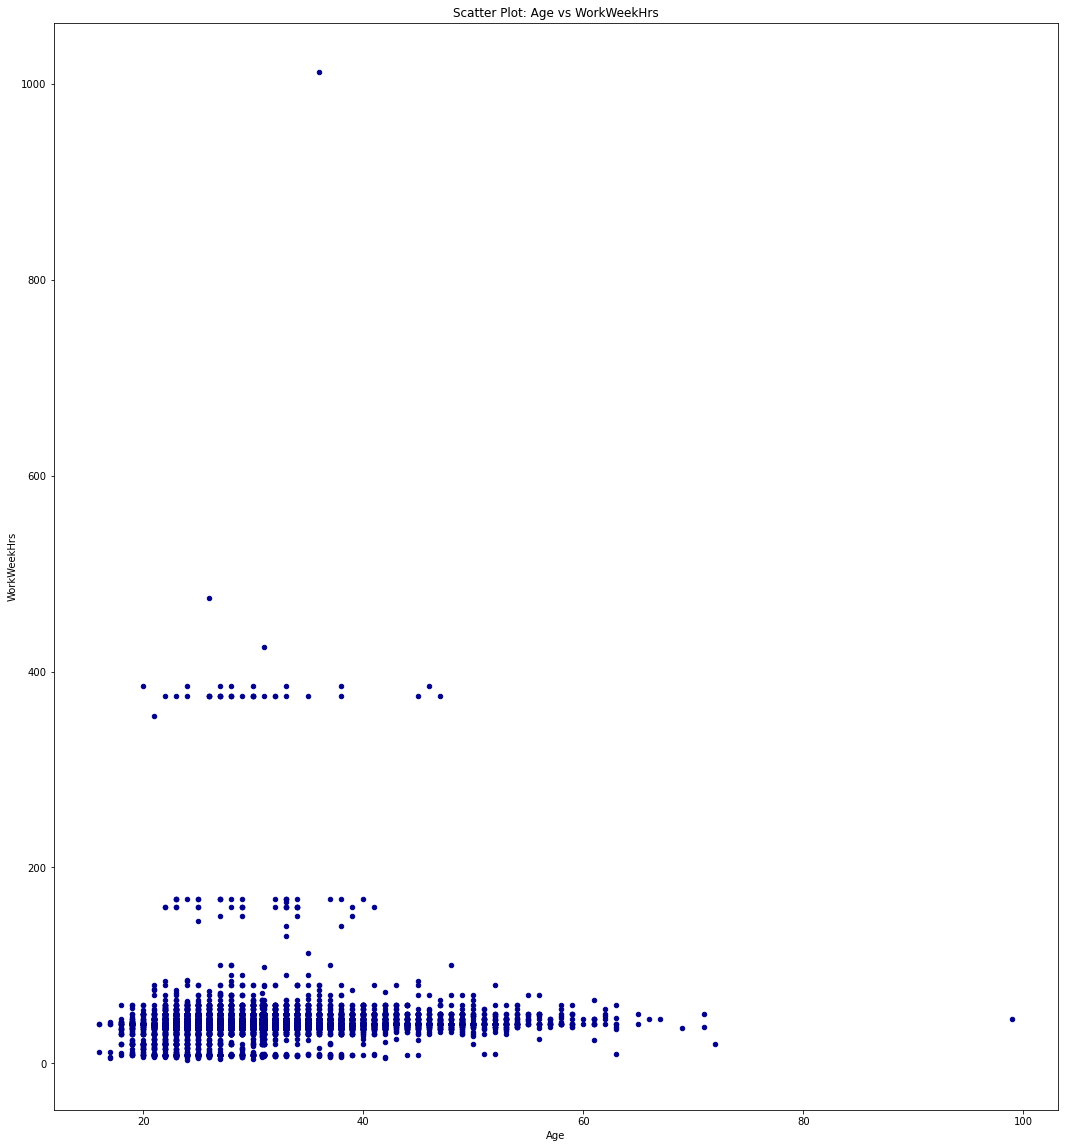

In [18]:
#Data Visualization wit Python - Wk 4

dfScattr.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(18, 20), color='darkblue')

plt.title('Scatter Plot: Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()


In [19]:
# your code goes here - WORKING CODE; SIMILAR CHART TO ONE ABOVE
#https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html

"""
sns.regplot(x= dfScattr['Age'], y=dfScattr['WorkWeekHrs'], data=dfScattr)
plt.ylim(0)
"""
"""
N = len(dfScattr['Age'])
colors = np.random.rand(N)

plt.figure(figsize = (16,8))

plt.scatter(x=dfScattr['Age'], y=dfScattr['WorkWeekHrs'], c=colors, alpha=0.5)
plt.title('Scatter Plot: Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()
"""

"\nN = len(dfScattr['Age'])\ncolors = np.random.rand(N)\n\nplt.figure(figsize = (16,8))\n\nplt.scatter(x=dfScattr['Age'], y=dfScattr['WorkWeekHrs'], c=colors, alpha=0.5)\nplt.title('Scatter Plot: Age vs WorkWeekHrs')\nplt.xlabel('Age')\nplt.ylabel('WorkWeekHrs')\nplt.show()\n"

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [20]:
dfBubble = pd.read_sql_query("SELECT WorkWeekHrs, CodeRevHrs, Age FROM master" , conn)


In [21]:
def ReplMissVal(x):
    
    import numpy as np
    if isinstance(x, np.numeric):   #np,float64):
        mean = x.mean()
        if sum(isnull(x)) > 0:
            replcemnt = x.replace(np,nan, mean)
        else:
            pass
    else:
        pass
    return replcemnt


In [23]:
ReplMissVal(df['CodeRevHrs'])

AttributeError: module 'numpy' has no attribute 'numeric'

In [ ]:
#Examine CODEREVHRS, WORKWEEKHRS, & AGE Columns for Missing Values

if dfBubble['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    meanCode = df['CodeRevHrs'].mean()
    dfBubble['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)

if dfBubble['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanWkHrs = df['WorkWeekHrs'].mean()
    dfBubble['WorkWeekHrs'].replace(np.nan, meanWkHrs, inplace=True)

if dfBubble['Age'].isnull().sum():  #See if any Missing Values
    meanAge = dfBubble['Age'].mean()
    dfBubble['Age'].replace(np.nan, meanAge, inplace=True)

In [ ]:
# Examine data distribution of dfBubble

dfBubble.describe()

In [ ]:
# normalize WORKWEEKHRS & CODEREVHRS Datasets

NormWorkHrs = (dfBubble['WorkWeekHrs'] - dfBubble['WorkWeekHrs'].min()) / (dfBubble['WorkWeekHrs'].max() - dfBubble['WorkWeekHrs'].min())

# normalize CodeRevHrs
NormCodeHrs = (dfBubble['CodeRevHrs'] - dfBubble['CodeRevHrs'].min()) / (dfBubble['CodeRevHrs'].max() - dfBubble['CodeRevHrs'].min())


In [ ]:
# Data Visualization - Lecturer Wk 4

# WorkWeekHrs
ax0 = dfBubble.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(18, 16),
                    alpha=0.5,  # transparency
                    color='green',
                    s=NormWorkHrs * 800 + 2,  # pass in weights 
                    xlim=(16, 98)
                    )

# CodeRevHrs
ax1 = dfBubble.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=NormCodeHrs * 800 + 2,
                    ax=ax0
                    )

ax0.set_ylabel('Respondent Time (Hours)')
ax0.set_title("Bubble Plot: WorkWeekHrs & CodeRevHrs sized by Age)", size=14)
ax0.legend(['WorkWeekHrs', 'CodeRevhrs'], loc='upper right', fontsize='medium')

### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
table_Name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfLang = pd.read_sql_query(QUERY, conn)
#print(dfLang.iat[0,0])

QUERY2 = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as cntLang FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by cntLang DESC
LIMIT 4
"""

dfDB = pd.read_sql_query(QUERY2, conn)
dfDB

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
table_Name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

In [ ]:
dfDB = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear", conn)
dfDB

In [ ]:
table_Name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

In [ ]:
QUERY = """ 
SELECT distinct(DatabaseDesireNextYear), count(DatabaseDesireNextYear) as cntDB from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(distinct(DatabaseDesireNextYear)) DESC
LIMIT 5 """

dfDB = pd.read_sql_query(QUERY, conn)
dfDB


In [ ]:
dfDB.info()

In [ ]:
#df['DatabaseWorkedWith'].value_counts()
#dfDB.reset_index('DatabaseWorkedWith', inplace=True, drop=True)

dfDB.set_index('DatabaseDesireNextYear')
labels = dfDB['DatabaseDesireNextYear']     #Extract labels
data = dfDB['cntDB']

In [ ]:
# your code goes here
#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

# Creating dataset
labels = dfDB['DatabaseDesireNextYear']
data = dfDB['cntDB']
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0)   #Must be same length as x (data)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo")
 
# Wedge properties
wp = { 'linewidth' : 1.3, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = labels,  
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color="magenta"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Top DBs",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Pie Chart - Top 5 Databases")
 
# show plot
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
where Age between 30 and 35
order by Age DESC
"""

qryStkChrt = pd.read_sql_query(QUERY, conn)
qryStkChrt


In [ ]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryStkChrt['Age'].isnull().sum() > 0:
    meanAge = qryStkChrt['Age'].mean()
    qryStkChrt['Age'] = qryStkChrt['Age'].fillna(meanAge)
    
if qryStkChrt['WorkWeekHrs'].isnull().sum() > 0:
    meanWork = qryStkChrt['WorkWeekHrs'].mean()
    qryStkChrt['WorkWeekHrs'] = qryStkChrt['WorkWeekHrs'].fillna(meanWork)

if qryStkChrt['CodeRevHrs'].isnull().sum() > 0:
    meanCode = qryStkChrt['CodeRevHrs'].mean()
    qryStkChrt['CodeRevHrs'] = qryStkChrt['CodeRevHrs'].fillna(meanCode)

"""
medCodekHrs = qrydf['CodeRevHrs'].median()
qrydf['CodeRevHrs'] = df['CodeRevHrs'].fillna(medCodeHrs)
"""

In [ ]:
#Using Python to Groupby

qryStkChrt2 = qryStkChrt[['WorkWeekHrs', 'CodeRevHrs', 'Age']]
qryStkChrt3 = qryStkChrt2.groupby(['Age'], as_index=False).median()
qryStkChrt3
                          

In [ ]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
#

x = qryStkChrt3['Age']     #['A', 'B', 'C', 'D']
y1 = qryStkChrt3['WorkWeekHrs']     #np.array([10, 20, 10, 30])
y2 = qryStkChrt3['CodeRevHrs']     #np.array([20, 25, 15, 25])
  

plt.figure(figsize=(16, 6))

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Ages Cat")
plt.ylabel("Median")
plt.legend(["WorkedWeekHrs", "CodeRevHrs"])
plt.title("Median Hours Worked & Coded by Age Group")
plt.show()

In [ ]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
where Age between 30 and 35
order by Age DESC
"""

qryStkChrt = pd.read_sql_query(QUERY, conn)
qryStkChrt

In [ ]:
# Using SQL to CAL MEDIAN
"""

SET @rowindex := -1;
 
SELECT
   AVG(d.distance) as Median 
FROM
   (SELECT @rowindex:=@rowindex + 1 AS rowindex,
           demo.distance AS distance
    FROM demo
    ORDER BY demo.distance) AS d
WHERE
d.rowindex IN (FLOOR(@rowindex / 2), CEIL(@rowindex / 2));

"""


## Visualizing comparison of data


### Line Chart



Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here
QUERY = """
Select ConvertedComp, Age from master
where Age between 45 and 60
order by Age
"""

qryLnChrt = pd.read_sql_query(QUERY, conn)
qryLnChrt

In [ ]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryLnChrt['ConvertedComp'].isnull().sum() > 0:
    meanConv = qryLnChrt['ConvertedComp'].mean()
    qryLnChrt['ConvertedComp'] = qryLnChrt['ConvertedComp'].fillna(meanConv)

if qryLnChrt['Age'].isnull().sum() > 0:
    meanAge = qryLnChrt['Age'].mean()
    qryLnChrt['Age'] = qryLnChrt['Age'].fillna(meanAge)


In [ ]:
# your code goes here Ages 25 - 35:  Used for Lab Responses

"""
QUERY =
Select ConvertedComp, Age from master
where Age between 25 and 35
order by Age
"""

"""
qryLnChrt = pd.read_sql_query(QUERY, conn)
qryLnChrt
"""

In [ ]:
# Find MEDIAN for ConvertedComp by Age

qrydf_LnChrt = qryLnChrt[['Age', 'ConvertedComp']]
qrydf_LnChrt2 = qrydf_LnChrt.groupby(['Age'], as_index=False).median()
qrydf_LnChrt2


In [ ]:
#PLOTTING LINE CHART
#https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/

plt.figure(figsize=(16, 6))
plt.plot(qrydf_LnChrt2['Age'], qrydf_LnChrt2['ConvertedComp'])
plt.xlabel("Age")  # add X-axis label
plt.ylabel("Converted Comp Median")  # add Y-axis label
plt.title("Line Chart: Age vs Converted Comp")  # add title
plt.show()

In [ ]:
"""qrydf_LnChrt2['ConvertedComp'].plot(kind='line', figsize=(16, 6)) # add to subplot 2

#plt.plot(qrydf_LnChrt2['Age'], qrydf_LnChrt2['ConvertedComp'])
plt.xlabel("Age")  # add X-axis label
plt.ylabel("Converted Comp Median")  # add Y-axis label
plt.title("Line Chart: Age vs Converted Comp")  # add title
plt.show()"""


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
#Get Distince MainBranch Values

QUERY = """
SELECT MainBranch, count(MainBranch) as cntBranch from master
group by MainBranch
order by MainBranch
"""

qryBrnch = pd.read_sql_query(QUERY, conn)
qryBrnch

#df['DatabaseW.value_counts()

In [ ]:
#  Remove Default Index column

qryBrnch.set_index("MainBranch", drop=False, inplace=True)

In [ ]:
#  Replacing nan values in MainBranch Col with Most Frequent Value

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryBrnch['MainBranch'].isnull().sum() > 0:
    meanBrnch = qryBrnch['MainBranch'],mean()
    qryBrnch['MainBranch'] = qryBrnch['MainBranch'].fillna(meanBrnch)


In [ ]:
qryBrnch.dtypes

In [ ]:
# your code goes here
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

brnch = qryBrnch['MainBranch']
cnt = qryBrnch['cntBranch']

# Figure Size
plt.figure(figsize=(16, 8))

# Horizontal Bar Plot
plt.barh(brnch, cnt)   

plt.ylabel("Main Branch Categories")  # add X-axis label
plt.xlabel("Main Branch Median (Count)")  # add Y-axis label
plt.title("Horizontal Barchart: Main Branch Category Median")  # add title

# Show Plot
plt.show()



In [ ]:
"""
cntBrnch = list(map(str, range(0, 10000)))

qryBrnch["MainBranch"].plot(kind = 'barh')

# Figure Size
plt.figure(figsize=(16, 8))

# Horizontal Bar Plot
#plt.barh(brnch, cnt)   

plt.ylabel("Main Branch Categories")  # add X-axis label
plt.xlabel("Main Branch Median (Count)")  # add Y-axis label
plt.title("Horizontal Barchart: Main Branch Category Median")  # add title

# Show Plot
plt.show()
"""

In [ ]:
#Get Distince MainBranch Values

QUERY = """
SELECT distinct(DevType), count(Respondent) as cnt from DevType
group by DevType
order by cnt DESC
"""

qryBrnch = pd.read_sql_query(QUERY, conn)
qryBrnch

#df['DatabaseW.value_counts()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja
Helena Rolle

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
